In [1]:
import numpy as np # linear algebra
import pandas as pd

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(columns=['Serial No.'],inplace=True)

In [7]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
x_train = pd.DataFrame(X_train_scaled)
x_test = pd.DataFrame(X_test_scaled)

In [14]:
x_train

,0,1,2,3,4,5,6
0,0.40,0.428571,0.50,0.250,0.571429,0.503205,0.0
1,0.56,0.642857,0.00,0.375,0.571429,0.557692,1.0
2,0.20,0.321429,0.50,0.625,0.285714,0.346154,0.0
3,0.20,0.250000,0.00,0.500,0.142857,0.000000,1.0
4,0.64,0.428571,0.50,0.625,0.714286,0.653846,1.0
...,...,...,...,...,...,...,...
395,0.34,0.642857,0.75,0.750,0.857143,0.503205,0.0
396,0.62,0.678571,1.00,1.000,1.000000,0.849359,1.0
397,0.70,0.535714,0.50,0.500,0.571429,0.740385,1.0
398,0.72,0.678571,1.00,0.875,0.714286,0.778846,1.0


In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [20]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.2680 - val_loss: 1.1057
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9633 - val_loss: 0.8531
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7635 - val_loss: 0.6483
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5662 - val_loss: 0.4841
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4258 - val_loss: 0.3494
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3141 - val_loss: 0.2401
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2104 - val_loss: 0.1559
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1366 - val_loss: 0.0943
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0812 - val_loss: 0.0530
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0473 - val_loss: 0.0281
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0273 - val_loss: 0.0152
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

In [21]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [22]:
y_pred

array([[0.65511143],
       [0.6994573 ],
       [0.99044067],
       [0.69920325],
       [0.79432255],
       [0.64882493],
       [0.7488749 ],
       [0.6608119 ],
       [0.78169745],
       [0.57394624],
       [0.7200213 ],
       [0.5270254 ],
       [0.8238825 ],
       [0.8529799 ],
       [0.7659196 ],
       [0.8290365 ],
       [0.6355207 ],
       [0.7437384 ],
       [0.9405761 ],
       [0.70357716],
       [0.5549975 ],
       [0.7580332 ],
       [0.8257494 ],
       [0.56865287],
       [0.8306252 ],
       [0.6277801 ],
       [0.98884624],
       [0.67195576],
       [0.86387074],
       [0.68068326],
       [0.65387225],
       [0.8040175 ],
       [0.59786534],
       [0.91048664],
       [0.5323576 ],
       [0.83439076],
       [0.7084523 ],
       [0.6982524 ],
       [0.6658267 ],
       [0.9450319 ],
       [0.54360616],
       [0.6015024 ],
       [0.77082103],
       [0.9857774 ],
       [0.77358943],
       [0.458966  ],
       [0.64154214],
       [0.626

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7760386648700729

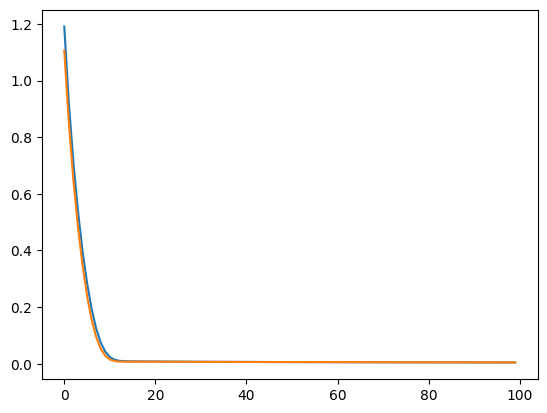

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])